# Reconstruction of 1, 2, 1+2 Neutron Responses for Constant P

In [1]:
%cd H:\GitHub\pytracer\

H:\GitHub\pytracer


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
import numpy as np
from scripts.utils import nice_double_plot
import pytracer.algorithms as algorithms

In [ ]:
response_single = np.load(r'scripts\data\fission_response_single.npy')
response_double = np.load(r'scripts\data\fission_response_double.npy')
single_probs = np.load(r'scripts\data\single_probs.npy')
double_probs = np.load(r'scripts\data\double_probs.npy')

d1 = single_probs.reshape((-1))
G1 = response_single.reshape((response_single.shape[0], -1)).T
d2 = single_probs.reshape((-1))
G2 = response_single.reshape((response_double.shape[0], -1)).T

# Single Neutron

In [ ]:
alphas = np.logspace(-5, -1, 100)
norms, residuals = algorithms.trace_lcurve(d1, G1, alphas)
plt.loglog(residuals, norms)

plt.figure()
c_alphas, curve = algorithms.lcurve_curvature(alphas, norms, residuals)
plt.semilogx(c_alphas, curve)

m1_alpha = algorithms.solve_tikhonov(d1, G1, 0.007)
m1_alpha = m1_alpha.reshape((30, 50))

plt.figure()
plt.imshow(m1_alpha, interpolation='none', vmax=1.0, vmin=0)
plt.colorbar()

# Double Neutron

In [ ]:
alphas = np.logspace(-5, -1, 100)
norms, residuals = algorithms.trace_lcurve(d2, G2, alphas)
plt.loglog(residuals, norms)

plt.figure()
c_alphas, curve = algorithms.lcurve_curvature(alphas, norms, residuals)
plt.semilogx(c_alphas, curve)

m2_alpha = algorithms.solve_tikhonov(d2, G2, 0.007)
m2_alpha = m2_alpha.reshape((30, 50))

plt.figure()
plt.imshow(m2_alpha, interpolation='none', vmax=1.0, vmin=0)
plt.colorbar()

# Single + Double Neutron

0.0109854114199
[  1.00000000e-06   1.32571137e-06   1.75751062e-06   2.32995181e-06
   3.08884360e-06   4.09491506e-06   5.42867544e-06   7.19685673e-06
   9.54095476e-06   1.26485522e-05   1.67683294e-05   2.22299648e-05
   2.94705170e-05   3.90693994e-05   5.17947468e-05   6.86648845e-05
   9.10298178e-05   1.20679264e-04   1.59985872e-04   2.12095089e-04
   2.81176870e-04   3.72759372e-04   4.94171336e-04   6.55128557e-04
   8.68511374e-04   1.15139540e-03   1.52641797e-03   2.02358965e-03
   2.68269580e-03   3.55648031e-03   4.71486636e-03   6.25055193e-03
   8.28642773e-03   1.09854114e-02   1.45634848e-02   1.93069773e-02
   2.55954792e-02   3.39322177e-02   4.49843267e-02   5.96362332e-02
   7.90604321e-02   1.04811313e-01   1.38949549e-01   1.84206997e-01
   2.44205309e-01   3.23745754e-01   4.29193426e-01   5.68986603e-01
   7.54312006e-01   1.00000000e+00]
[ 11.81618787   1.18161878   1.18161877   1.18161875   1.18161872
   1.18161866   1.18161856   1.18161839   1.18161808  

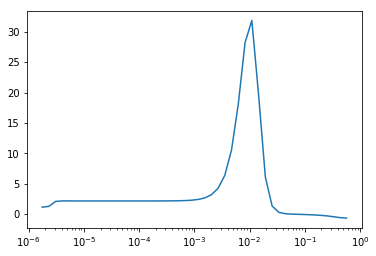

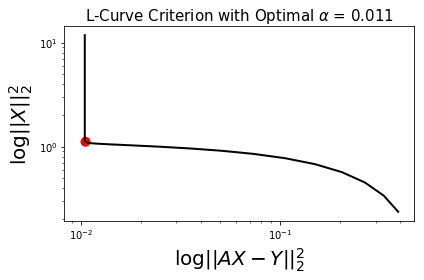

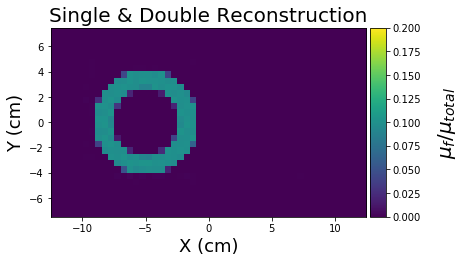

In [4]:
d = np.concatenate((d1, d2)) * 0.2
G = np.concatenate((G1, G2))

alphas = np.logspace(-6, 0, 50)
norms, residuals = algorithms.trace_lcurve(d, G, alphas)

plt.figure()
c_alphas, curve = algorithms.lcurve_curvature(alphas, norms, residuals)
plt.semilogx(c_alphas, curve)

best_alpha_arg = np.argmax(curve)
best_alpha = c_alphas[best_alpha_arg]

norms[0] *= 10
plt.figure()
plt.loglog(residuals, norms, 'k', lw=2)
plt.xlabel(r'$\log{||A X - Y||_2^2}$', size=20)
plt.ylabel(r'$\log{||X||_2^2}$', size=20)
plt.title(r'L-Curve Criterion with Optimal $\alpha$ = {:.3f}'.format(best_alpha), size=15)
plt.scatter(residuals[best_alpha_arg], norms[best_alpha_arg], c='red', s=100, edgecolors='none')
plt.tight_layout()

m_alpha = algorithms.solve_tikhonov(d, G, 0.01)
m_alpha = m_alpha.reshape((30, 50))

plt.figure(figsize=(6, 4))
ax = plt.gca()
im = plt.imshow(m_alpha, interpolation='none', vmax=0.2, vmin=0, extent=[-25. / 2, 25. / 2, -15. / 2, 15. / 2],
                cmap='viridis')
plt.title('Single & Double Reconstruction', size=20)
plt.xlabel('X (cm)', size=18)
plt.ylabel('Y (cm)', size=18)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax)
cb.set_label(r'$\mu_f / \mu_{total}$', size=20, labelpad=15)

plt.show()